<a href="https://colab.research.google.com/github/cosmina98/PhD/blob/main/MLP_on_graph_classification_using_PyTorch/MLP_ON_VISION_DATASETS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Multilayer Perceptron On Cifar10

> Indented block

1.   List item
2.   List item






In [30]:
# libary imports 
import os
import torch
from torch import nn
import torchvision
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
from torchvision import transforms
import torchvision.datasets as datasets

from sklearn import metrics
from sklearn import decomposition
from sklearn import manifold
from tqdm.notebook import trange, tqdm

import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data

import matplotlib.pyplot as plt
import numpy as np
import copy
import random
import time

In [55]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [23]:
#definining the MLP class
class MLP(nn.Module):
  '''
    Multilayer Perceptron.
  '''
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Flatten(),
      nn.Linear(32 * 32 * 3, 64),
      nn.ReLU(),
      nn.Linear(64, 32),
      nn.ReLU(),
      nn.Linear(32, 10)
    )


  def forward(self, x):
    '''Forward pass'''
    return self.layers(x)
  

In [24]:
torch.manual_seed(42)
ROOT = '.data'


# Prepare CIFAR-10 dataset
trainset = CIFAR10(os.getcwd(), download=True, transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
trainloader = torch.utils.data.DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)

testset = CIFAR10(os.getcwd(), download=True, transform=transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))
testloader = torch.utils.data.DataLoader(testset, batch_size=8, shuffle=True, num_workers=2)


Files already downloaded and verified
Files already downloaded and verified


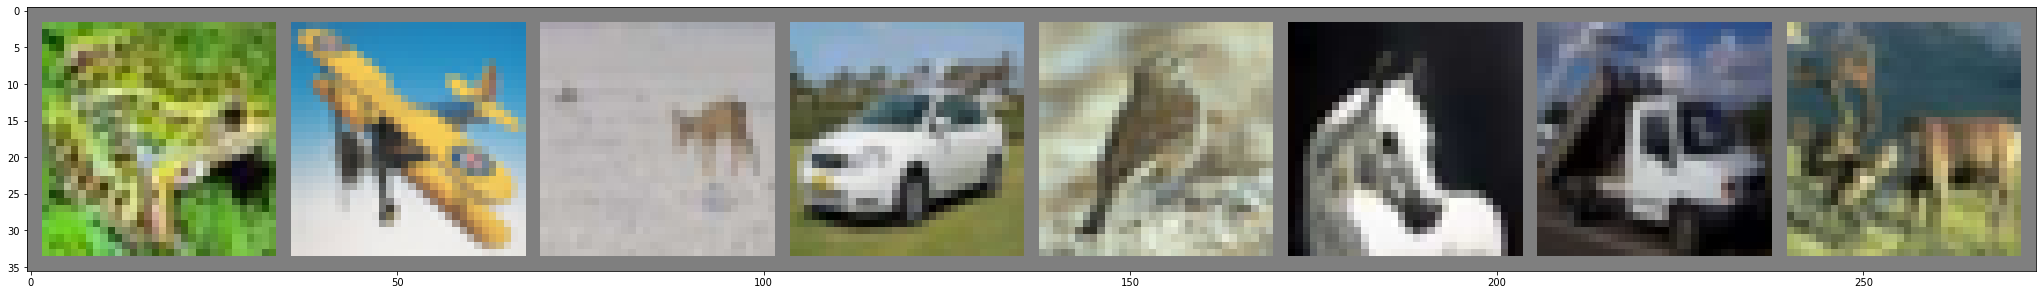

frog  plane deer  car   bird  horse truck deer 


In [5]:
#show data

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.subplots(figsize=(36, 36))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

In [6]:

# Initialize the MLP
mlp = MLP()
  
# Define the loss function and optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(mlp.parameters(), lr=1e-3,momentum=0.9)
optimizer_2 = torch.optim.Adam(mlp.parameters(), lr=1e-4)


In [17]:
def evaluate(optimizer):
    for epoch in range(2):  # loop over the dataset multiple times

       running_loss = 0.0
       for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + compute loss+ backward + optimize
        outputs = mlp(inputs)
        loss = loss_function(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

    print('Finished Training')


In [18]:
evaluate(optimizer)



[1,  2000] loss: 1.268
[1,  4000] loss: 1.278
[1,  6000] loss: 1.280
[2,  2000] loss: 1.229
[2,  4000] loss: 1.237
[2,  6000] loss: 1.260
Finished Training


In [19]:
evaluate(optimizer_2)


[1,  2000] loss: 1.154
[1,  4000] loss: 1.171
[1,  6000] loss: 1.164
[2,  2000] loss: 1.120
[2,  4000] loss: 1.135
[2,  6000] loss: 1.155
Finished Training


#2 - Multilayer Perceptron On MNIST


`To` ensure we get reproducible results we set the random seed for Python, Numpy and PyTorch.

In [25]:
SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

In [33]:
#import torchvision.datasets as datasets
train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True)

In [36]:
mean = train_data.data.float().mean() / 255
std = train_data.data.float().std() / 255
print(f'Calculated mean: {mean}')
print(f'Calculated std: {std}')

Calculated mean: 0.13066047430038452
Calculated std: 0.30810779333114624


Apply the following transformations:
1)`RandomRotation` - Randomly rotate the image between (-x, +x) degrees where x=5, fill=(0,) doesn't do much
2)`RandomCrop` Add 2 pixels to artiffiicially augmnt the image, and crop 28 by 28 pixels out of that image 
3)`ToTensor()`- converts the image from PIL image to a Tensor 
4) `Normalise` - this subtracts the mean and divides by the standard deviations given

In [39]:
#load data 

train_data = datasets.MNIST(root=ROOT,
                            train=True,
                            download=True,
                            transform= transforms.Compose([
                            transforms.RandomRotation(5, fill=(0,)),
                            transforms.RandomCrop(28, padding=2),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=[mean], std=[std])
                                      ]))

test_data = datasets.MNIST(root=ROOT,
                           train=False,
                           download=True,
                           transform= transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize(mean=[mean], std=[std])
                                     ]))

In [40]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 60000
Number of testing examples: 10000


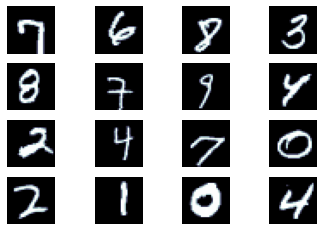

In [49]:
#plot some data
def plot_images(images):

    n_images = len(images)

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure()
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(images[i].view(28, 28).cpu().numpy(), cmap='bone')
        ax.axis('off')
N_IMAGES = 16

images = [image for image, label in [train_data[i] for i in range(N_IMAGES)]]

plot_images(images)

In [46]:
#take 10 percent of the samples as the validation set
VALID_RATIO = 0.9

n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples

train_data, valid_data = data.random_split(train_data,
                                           [n_train_examples, n_valid_examples])

print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 54000
Number of validation examples: 6000
Number of testing examples: 10000


In [66]:
#dataloaders
BATCH_SIZE = 64

train_iterator = data.DataLoader(train_data,
                                 shuffle=True,
                                 batch_size=BATCH_SIZE)

valid_iterator = data.DataLoader(valid_data,
                                 batch_size=BATCH_SIZE)

test_iterator = data.DataLoader(test_data,
                                batch_size=BATCH_SIZE)

In [50]:
INPUT_DIM = 28 * 28
OUTPUT_DIM = 10

Defining the MLP
2 hidden layers


In [53]:

class MLP(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()

        self.input_fc = nn.Linear(input_dim, 250)
        self.hidden_fc = nn.Linear(250, 100)
        self.output_fc = nn.Linear(100, output_dim)

    def forward(self, x):

        # x = [batch size, height, width]
        batch_size = x.shape[0]
        x = x.view(batch_size, -1)

        # x = [batch size, height * width]
        h_1 = F.relu(self.input_fc(x))

        # h_1 = [batch size, 250]
        h_2 = F.relu(self.hidden_fc(h_1))

        # h_2 = [batch size, 100]
        y_pred = self.output_fc(h_2)

        # y_pred = [batch size, output dim]
        return y_pred, h_2

In [57]:
#instantiate the model
model = MLP(INPUT_DIM, OUTPUT_DIM)

<generator object Module.parameters at 0x7f33233f4050>


In [100]:
#function to count the trainable parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 222,360 trainable parameters


In [59]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

model = model.to(device)
loss_function = loss_function.to(device)

In [60]:
def calculate_accuracy(y_pred, y):
    top_pred = y_pred.argmax(1, keepdim=True)
    correct = top_pred.eq(y.view_as(top_pred)).sum()
    acc = correct.float() / y.shape[0]
    return acc

In [61]:
#training loop
def train(model, iterator, optimizer, loss_function, device):

    epoch_loss = 0
    epoch_acc = 0

    model.train()

    for (x, y) in tqdm(iterator, desc="Training", leave=False):
        #iterate over our dataloader, returning batches of (image, label)
        x = x.to(device)
        y = y.to(device)
        #clear the gradients calculated from the last batch
        optimizer.zero_grad()
        #pass our batch of images, x, through to model to get predictions, y_pred
        y_pred, _ = model(x)
        #calculate the loss between our predictions and the actual labels
        loss = loss_function(y_pred, y)
        #calculate the accuracy between our predictions and the actual labels
        acc = calculate_accuracy(y_pred, y)
        #calculate the gradients of each parameter
        loss.backward()
        #update the parameters by taking an optimizer step
        optimizer.step()
        #update our metrics
        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [68]:
#evaluation loop
def evaluate(model, iterator, loss_function, device):

    epoch_loss = 0
    epoch_acc = 0
    #we put our model into evaluation mode with model.eval()
    #Disabling gradient calculation
    model.eval()
    #we wrap the iterations inside a with torch.no_grad()
    with torch.no_grad():

        for (x, y) in tqdm(iterator, desc="Evaluating", leave=False):
            #same loop as before with the same steps
                       #excepting that we do not calculate gradients as we are not updating parameters
                       #we do not take an optimizer step as we are not calculating gradients
            x = x.to(device)
            y = y.to(device)

            y_pred, _ = model(x)

            loss = loss_function(y_pred, y)

            acc = calculate_accuracy(y_pred, y)

            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [76]:
#measuring the length of an epoch
def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [77]:
EPOCHS = 10

best_valid_loss = float('inf')

for epoch in trange(EPOCHS):

    start_time = time.monotonic()

    train_loss, train_acc = train(model, train_iterator, optimizer, loss_function, device)
    valid_loss, valid_acc = evaluate(model, valid_iterator, loss_function, device)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut1-model.pt')

    end_time = time.monotonic()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

  0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 01 | Epoch Time: 0m 44s
	Train Loss: 0.120 | Train Acc: 96.32%
	 Val. Loss: 0.145 |  Val. Acc: 95.35%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 02 | Epoch Time: 0m 42s
	Train Loss: 0.107 | Train Acc: 96.69%
	 Val. Loss: 0.100 |  Val. Acc: 96.99%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 03 | Epoch Time: 0m 41s
	Train Loss: 0.099 | Train Acc: 96.89%
	 Val. Loss: 0.101 |  Val. Acc: 96.85%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 04 | Epoch Time: 0m 44s
	Train Loss: 0.095 | Train Acc: 97.03%
	 Val. Loss: 0.082 |  Val. Acc: 97.53%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 05 | Epoch Time: 0m 57s
	Train Loss: 0.088 | Train Acc: 97.27%
	 Val. Loss: 0.080 |  Val. Acc: 97.72%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 06 | Epoch Time: 0m 37s
	Train Loss: 0.085 | Train Acc: 97.35%
	 Val. Loss: 0.078 |  Val. Acc: 97.42%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 07 | Epoch Time: 0m 38s
	Train Loss: 0.079 | Train Acc: 97.48%
	 Val. Loss: 0.085 |  Val. Acc: 97.48%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 08 | Epoch Time: 0m 41s
	Train Loss: 0.077 | Train Acc: 97.63%
	 Val. Loss: 0.073 |  Val. Acc: 97.57%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 09 | Epoch Time: 0m 39s
	Train Loss: 0.072 | Train Acc: 97.73%
	 Val. Loss: 0.076 |  Val. Acc: 97.73%


Training:   0%|          | 0/844 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/94 [00:00<?, ?it/s]

Epoch: 10 | Epoch Time: 0m 39s
	Train Loss: 0.069 | Train Acc: 97.78%
	 Val. Loss: 0.087 |  Val. Acc: 97.52%


In [71]:
#check the performance on the test set using the parameters that performed the best on the validation set
model.load_state_dict(torch.load('tut1-model.pt'))

test_loss, test_acc = evaluate(model, test_iterator, loss_function, device)
print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Evaluating:   0%|          | 0/157 [00:00<?, ?it/s]

Test Loss: 0.124 | Test Acc: 96.44%


In [81]:
#get some predictions
def get_predictions(model, iterator, device):

    model.eval()

    images = []
    labels = []
    probs = []

    with torch.no_grad():

        for (x, y) in iterator:

            x = x.to(device)

            y_pred, _ = model(x)

            y_prob = F.softmax(y_pred, dim=-1)

            images.append(x.cpu())
            labels.append(y.cpu())
            probs.append(y_prob.cpu())

    images = torch.cat(images, dim=0)
    labels = torch.cat(labels, dim=0)
    probs = torch.cat(probs, dim=0)

    return images, labels, probs

In [82]:
images, labels, probs = get_predictions(model, test_iterator, device)

pred_labels = torch.argmax(probs, 1)

In [83]:
def plot_confusion_matrix(labels, pred_labels):

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(1, 1, 1)
    cm = metrics.confusion_matrix(labels, pred_labels)
    cm = metrics.ConfusionMatrixDisplay(cm, display_labels=range(10))
    cm.plot(values_format='d', cmap='Blues', ax=ax)

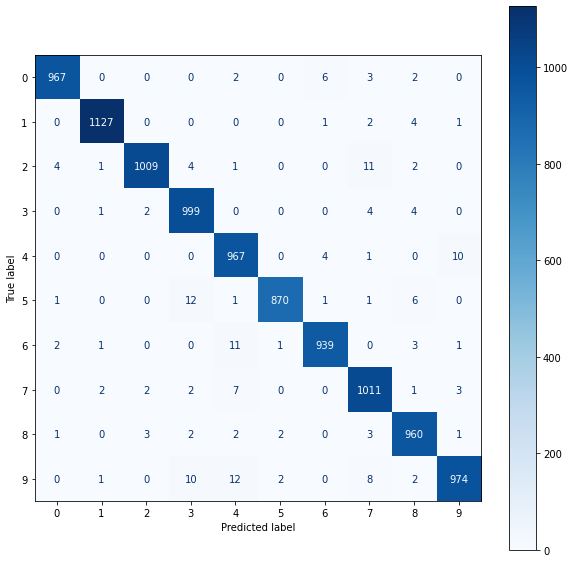

In [84]:
plot_confusion_matrix(labels, pred_labels)

In [85]:
corrects = torch.eq(labels, pred_labels)
incorrect_examples = []

for image, label, prob, correct in zip(images, labels, probs, corrects):
    if not correct:
        incorrect_examples.append((image, label, prob))

incorrect_examples.sort(reverse=True,
                        key=lambda x: torch.max(x[2], dim=0).values)

In [86]:
def plot_most_incorrect(incorrect, n_images):

    rows = int(np.sqrt(n_images))
    cols = int(np.sqrt(n_images))

    fig = plt.figure(figsize=(20, 10))
    for i in range(rows*cols):
        ax = fig.add_subplot(rows, cols, i+1)
        image, true_label, probs = incorrect[i]
        true_prob = probs[true_label]
        incorrect_prob, incorrect_label = torch.max(probs, dim=0)
        ax.imshow(image.view(28, 28).cpu().numpy(), cmap='bone')
        ax.set_title(f'true label: {true_label} ({true_prob:.3f})\n'
                     f'pred label: {incorrect_label} ({incorrect_prob:.3f})')
        ax.axis('off')
    fig.subplots_adjust(hspace=0.5)

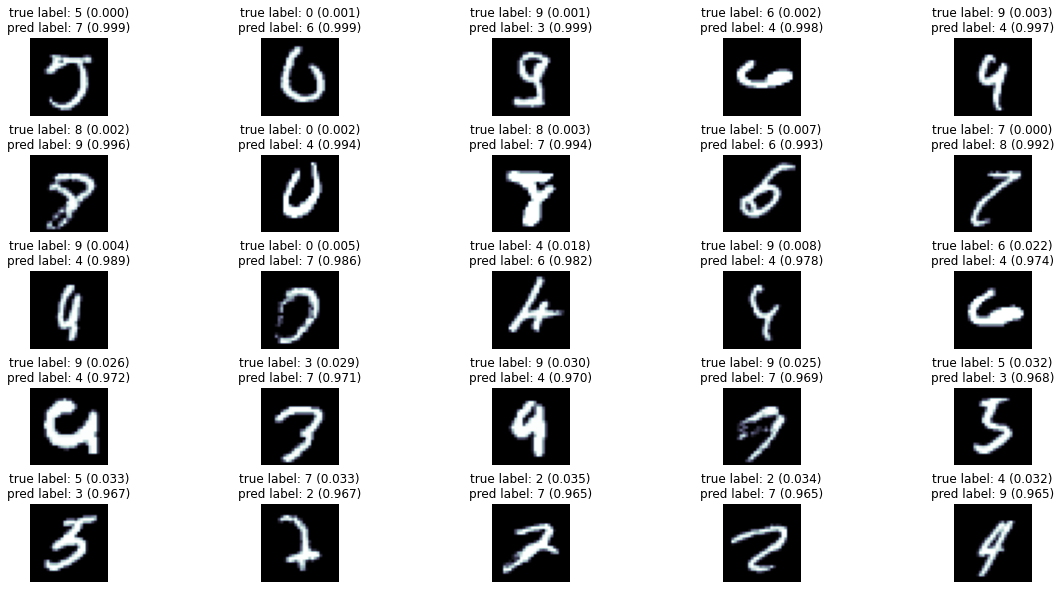

In [87]:
N_IMAGES = 25

plot_most_incorrect(incorrect_examples, N_IMAGES)